# Multiple Layer GRU

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.1


In [4]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.1


In [5]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [4]:
tokenizer = info.features['text'].encoder

In [6]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset)) # train_dataset.output_shapes
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset)) #test_dataset.output_shapes

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 32s 63ms/step - loss: 0.5816 - accuracy: 0.6471 - val_loss: 0.3321 - val_accuracy: 0.8668
Epoch 2/10
391/391 [==============================] - 18s 43ms/step - loss: 0.2337 - accuracy: 0.9119 - val_loss: 0.3086 - val_accuracy: 0.8778
Epoch 3/10
391/391 [==============================] - 16s 39ms/step - loss: 0.1655 - accuracy: 0.9428 - val_loss: 0.3291 - val_accuracy: 0.8724
Epoch 4/10
391/391 [==============================] - 16s 38ms/step - loss: 0.1258 - accuracy: 0.9580 - val_loss: 0.3697 - val_accuracy: 0.8674
Epoch 5/10
391/391 [==============================] - 16s 38ms/step - loss: 0.1008 - accuracy: 0.9664 - val_loss: 0.4232 - val_accuracy: 0.8618
Epoch 6/10
391/391 [==============================] - 16s 37ms/step - loss: 0.0824 - accuracy: 0.9748 - val_loss: 0.4768 - val_accuracy: 0.8577
Epoch 7/10
391/391 [==============================] - 16s 37ms/step - loss: 0.0668 - accuracy: 0.9797 - val_loss: 0.6108 - val_accuracy:

In [11]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

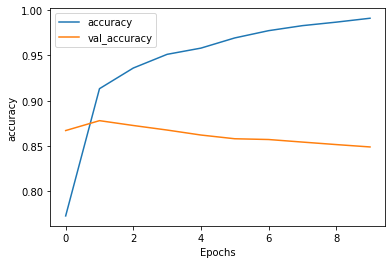

In [12]:
plot_graphs(history, 'accuracy')

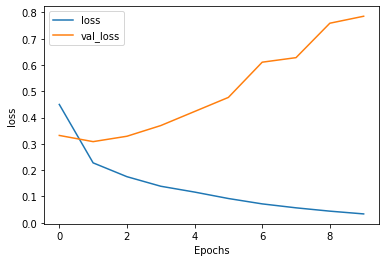

In [13]:
plot_graphs(history, 'loss')